Problem 16.2

In [64]:
import numpy as np
import matplotlib.pyplot as plt

In [65]:
def average(x):
    a = 0.0
    for i in range(len(x)):
        a = a+x[i]
    a = a/len(x)
    return a

In [66]:
x = [[-2.0, -3.0], [-1.0, -1.0], [0.0, 5.0], [2.0, 5.0], [3.0, 1.0]]
x = np.array(x)
print(x)
N = x.shape[0]
print(np.multiply(x[:,0],x[:,0]))

[[-2. -3.]
 [-1. -1.]
 [ 0.  5.]
 [ 2.  5.]
 [ 3.  1.]]
[4. 1. 0. 4. 9.]


In [67]:
one = N*average(np.multiply(x[:,0], x[:,1]))
two = N*average(x[:,0]) * average(x[:,1])
three = N*average(np.multiply(x[:,0], x[:,0]))
four = N*average(x[:,0]) * average(x[:,0])

In [68]:
a = (one - two)/(three - four)
print(a)
b = average(x[:,1]) - a*average(x[:,0])
print(b)

1.0
0.9999999999999999


Text(0, 0.5, 'y')

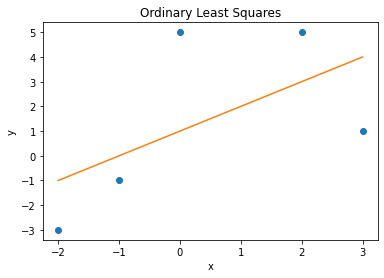

In [70]:
disc = np.linspace(-2, 3, 50)
discout = np.linspace(-2,3,50)
for i in range(len(disc)):
    discout[i] = a*disc[i] + b
    

plt.plot(x[:,0], x[:,1], 'o')
plt.plot(disc, discout)
plt.title("Ordinary Least Squares")
plt.xlabel("x")
plt.ylabel("y")

Problem 17.1

In [2]:
import numpy as np

In [2]:
def h2(x):
    z = x[1,0]**2 - x[0,0]**2
    g = np.sqrt(z**2 + 1) + z
    return 40.*np.sqrt(g) + (x[0,0]-10.)**2 + x[1,0]**2

def gradh2(x):
    z = x[1,0]**2 - x[0,0]**2
    g = np.sqrt(z**2 + 1) + z
    gradh2 = np.array([[0.], [0.]])
    gradh2[0] = (20./np.sqrt(g))*(z/np.sqrt(z**2+1) + 1)*-2.*x[0,0] + 2.*(x[0,0] - 10)
    gradh2[1] = (20./np.sqrt(g))*(z/np.sqrt(z**2+1) + 1)*2.*x[1,0] + 2.*x[1,0]
    return gradh2

In [8]:
# Initialization with initial point (-50, 40)
x = np.array([[-50], [40]])
oldH = 0.
H = h2(x)
dt = 0.01

while (abs(H - oldH) > 1.e-10):
    print (x[0,0], x[1,0], H, dt)
    oldx, oldH, H_x = x, H, gradh2(x)
    x, dt = x - dt*H_x, 1.1*dt
    H = h2(x)
    if (H > oldH):
        x, H, oldH, dt = oldx, oldH, oldH + 1., 0.5*dt

-50 40 5200.942808896046 0.01
-48.800523782396674 39.199580974082664 4995.0818207771445 0.011000000000000001
-47.50753051210086 38.336693573899595 4777.826196293249 0.012100000000000001
-46.116584332161985 37.408351619421666 4549.504557576238 0.013310000000000002
-44.6236458921524 36.41182338627369 4310.660019548059 0.014641000000000003
-43.02523277846386 35.34473398770364 4062.078388497279 0.016105100000000004
-41.318606582516374 34.205182792885736 3804.814202941951 0.017715610000000007
-39.50198839761784 32.991875024381194 3540.212639566277 0.019487171000000008
-37.57480459225403 31.704264766413733 3269.924942032744 0.021435888100000012
-35.53796576415913 30.342703028671277 2995.9147920934874 0.023579476910000015
-33.39418595090361 28.908577073892133 2720.4531232434247 0.025937424601000018
-31.14836289902167 27.404409560255242 2446.0997473189027 0.02853116706110002
-28.808085479373208 25.833836607332614 2175.673275227964 0.031384283767210024
-26.384500138580805 24.201215389179527 191

Problem 17.2

In [2]:
import numpy as np

In [3]:
def v_2(x):
    return (x[0][0]+3)**2 + (x[1][0]**2)*np.exp(-2*x[0][0])

def gradv2(x):
    gradv2 = np.array([[0.],[0.]])
    gradv2[0][0] = 2*(x[0][0]+3) - 2*(x[1][0]**2)*np.exp(-2*x[0][0])
    gradv2[1][0] = 2*x[1][0]*np.exp(-2*x[0][0])
    return gradv2

In [4]:
# Initialization
x = np.array([[0.], [1.]])
oldV = 0.
V = v_2(x)
dt = 0.01

while (abs(V - oldV) > 1.e-15):
    print(x[0][0], x[1][0], V, dt, abs(V-oldV))
    oldx, oldV, V_x =  x, V, gradv2(x)
    x, dt = x - dt*V_x, 1.1*dt
    V = v_2(x)
    if (V > oldV):
        x, V, oldV, dt = oldx, oldV, oldV + 1, 0.5*dt
        
print(x, V)

0.0 1.0 10.0 0.01 10.0
-0.04 0.98 9.80198889979503 0.011000000000000001 0.1980111002049707
-0.08223144420450934 0.9566443308209279 9.592137057814615 0.012100000000000001 0.20985184198041473
-0.12673536140921798 0.9293551063887507 9.368519376291404 0.013310000000000002 0.22361768152321027
-0.17359707486310227 0.8974786029706802 9.128364143394611 0.014641000000000003 0.24015523289679308
-0.22298386991718255 0.8602900446147449 8.867853959442508 0.016105100000000004 0.26051018395210335
-0.27519598430855857 0.8170068161327826 8.581957127520912 0.017715610000000007 0.28589683192159576
-0.3307310136038675 0.7668137205162177 8.264325676859476 0.019487171000000008 0.3176314506614357
-0.3903594274170563 0.7089057992511751 7.907305562590507 0.021435888100000012 0.35702011426896973
-0.45520551527030534 0.6425587066097421 7.502131952722102 0.023579476910000015 0.4051736098684042
-0.5268230597095407 0.5672468313682568 7.039466367129314 0.025937424601000018 0.4626655855927888
-0.6072454036408562 0.48

Part (b)

In [14]:
def w_2(x):
    y = np.copy(x)
    y[1][0] = y[1][0]/20.
    return v_2(y)

def gradw2(x):
    y = np.copy(x)
    y[1][0] = y[1][0]/20.
    z = gradv2(y)
    z[1][0] = (1./20.)*z[1][0]
    return z

In [18]:
# initialization
x = np.array([[0], [20]])
oldW = 0.
W = w_2(x)
dt = 0.01

while (abs(W - oldW) > 1.e-15):
    print(x[0][0], x[1][0], W, dt)
    oldx, oldW, W_x = x, W, gradw2(x)
    x, dt = x - dt*W_x, 1.1*dt
    W = w_2(x)
    if (W >= oldW):
        x, W, oldW, dt = oldx, oldW, oldW + 1., 0.5*dt
    
print(x, W)

0 20 10.0 0.01
-0.04 19.999 9.844778741676407 0.011000000000000001
-0.08129006768311903 19.997808443806345 9.695152434553712 0.012100000000000001
-0.12345675671891382 19.99638498326034 9.55410672469341 0.013310000000000002
-0.1659672342747246 19.994681520178947 9.424662116551765 0.014641000000000003
-0.2081658865870041 19.992641602959335 9.309610985511265 0.016105100000000004
-0.24928416670754827 19.990200342019005 9.211187152218569 0.017715610000000007
-0.288469901166332 19.987285139450194 9.13071336697056 0.019487171000000008
-0.3248412329484972 19.983817496438675 9.068309518157234 0.021435888100000012
-0.3575662748324481 19.979715989502317 9.022768771257585 0.023579476910000015
-0.3859616687100902 19.974900154472905 8.991692599639148 0.025937424601000018
-0.4095928479625026 19.969294536215713 8.9719002732153 0.02853116706110002
-0.4283501554440649 19.962831745519402 8.960012385808325 0.031384283767210024
-0.4424743624726974 19.95545330483564 8.953016521201535 0.03452271214393103
-0.

Problem 17.3

In [1]:
import numpy as np

In [2]:
def fx(x):
    return (x[0][0]-5)**2 + x[1][0]**2 + (100/(1+ np.exp(10*x[1][0] + 2*x[0][0]**2 - 50 )))

def gradf(x):
    z = np.exp(10*x[1][0] + 2*x[0][0]**2 - 50)
    gradf = np.array([[0.], [0.]])
    gradf[0][0] = 2*(x[0][0] - 5) - (400*x[0][0]*z)/((1+z)**2)
    gradf[1][0] = 2*x[1][0] - (1000*z)/((1+z)**2)
    return gradf


    

In [3]:
#initialization
x = np.array([[-10.], [0.]])
oldf = 0.
f = fx(x)
dt = 0.01

while (abs(f - oldf) > 1.e-15):
    print(x[0][0], x[1][0], f, dt)
    oldx, oldf, f_x = x, f, gradf(x)
    x, dt = x - dt*f_x, 1.1*dt
    f = fx(x)
    if (f > oldf):
        x, f, oldf, dt = oldx, oldf, oldf+1, 0.5*dt
    
print(x, f)
    
    

-10.0 0.0 225.0 0.01
-9.7 7.1750959731644115e-65 216.08999999999997 0.011000000000000001
-9.3766 1.0729611966140542e-59 206.68662756 0.012100000000000001
-9.02868628 2.6954070681692834e-54 196.80403874266025 0.013310000000000002
-8.6552426512264 1.081393661952187e-48 186.4656518638726 0.014641000000000003
-8.255389835913189 6.478802720835788e-43 175.70535970203068 0.016105100000000004
-7.828431078220458 5.322073191721832e-37 164.5686439286525 0.017715610000000007
-7.373904114433191 5.397407322692886e-31 153.11350303318667 0.019487171000000008
-6.891639343602065 5.962326568435793e-25 141.41108627830457 0.021435888100000012
-6.381823643012042 6.201545492403604e-19 129.54590944063008 0.023579476910000015
-5.845068747445167 5.148153192419439e-13 117.61551723210653 0.025937424601000018
-5.2824831057992085 2.8409170742205634e-07 106.02852710867725 0.02853116706110002
-5.2824831057992085 2.8409170742205634e-07 106.02852710867725 0.015692141883605012
-5.2824831057992085 2.8409170742205634e-07 